Welcome to the Second Data project.In this project we will be looking at the from the stock market, 
Also from this project we will how to use pandas to get stock information, Visualize different aspects of it.
Finally we look at few ways to analyze the risk of the stock data,based on the previous performance history.
we will also be predicting future stock price using Monte Carlo Method.

we will answer the following question to find the hidden insights from the data.

    1)what was the change in stock price over the time?
    
    2)What was the daily return stock average?
    
    3)what was the moving average of various stocks?
    
    4)What was the corellation between the stock closing prices?
    
    5)What was the corellation between the different stocks daily returns?
    
    6)How much value do we put at risk by investing at aparticular stock?
    
    7)How can we attempt to predict future stock behaviour?


In [3]:
#!pip install pandas-datareader

# Pandas-Python Library 
# We import pandas for cleaning, Manipulating and Analyzing the data
#Let's start with some imports
import pandas as pd

# Pandas Dataframe is a two dimensional tabular data Structure
# Pandas Series-one Dimensional array which is used for holding int,float,string,etc
from pandas import Series,DataFrame

#numpy is a python library function which is used to create powerful data structures
import numpy as np
    

In [4]:
# For Visualization
#using Matplotlib good visualizations can be created
import matplotlib.pyplot as plt

#Seaborn is a Python data visualization library based on matplotlib.
#High level interface can be provided by the seaborn for drawing attractive and informatic statistcal graphs
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
# For reading stock data from the Web
from pandas_datareader.data import DataReader

# For time stamps
#we use time stamps to fix start date and end date
from datetime import datetime

# For division
from __future__ import division

In [6]:
# The tech stocks we'll use for this analysis
tech_list = ['TSLA','GOOG','MSFT','FB']

# Set up End and Start times for data grab
end_date = datetime.now()
start_date = datetime(end_date.year - 1,end_date.month,end_date.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start_date,end_date)

In [7]:
# Summary Stats
TSLA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,514.377362,488.556765,502.382400,502.631672,5.212628e+07,502.631672
std,218.273723,209.600928,214.549427,214.322620,2.913905e+07,214.322620
min,160.671997,152.660004,156.000000,158.192001,1.515770e+07,158.192001
25%,330.117996,297.800003,321.000000,312.311996,3.146130e+07,312.311996
50%,457.790009,435.309998,447.940002,447.369995,4.339850e+07,447.369995
75%,701.475006,668.100006,686.350006,683.009979,6.736590e+07,683.009979
max,900.400024,871.599976,891.380005,883.090027,2.221262e+08,883.090027


In [8]:
# General Info
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-05-11 to 2021-05-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

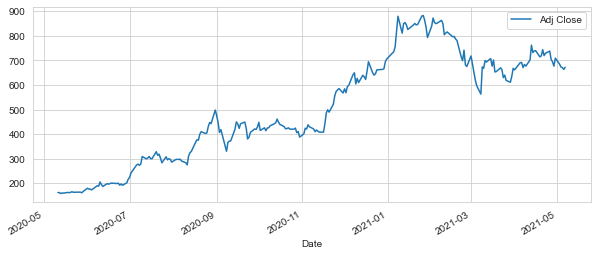

In [9]:
# Let's see a historical view of the closing price
TSLA['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

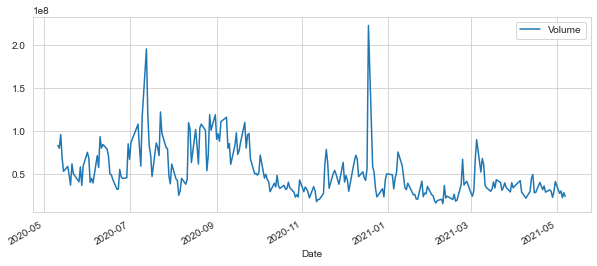

In [10]:
# Now let's plot the total volume of stock being traded each day over the past 12 months
TSLA['Volume'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

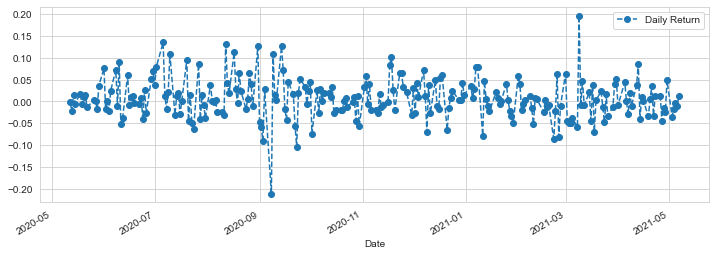

In [11]:
# We'll use pct_change to find the percent change for each day
TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
TSLA['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

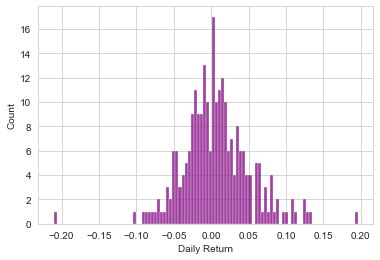

In [12]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(TSLA['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#TSLA['Daily Return'].hist()

In [13]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    TSLA[column_name]=TSLA['Adj Close'].rolling(ma).mean()
    
    #moving_avg = ts_log.rolling(12).mean()

<AxesSubplot:xlabel='Date'>

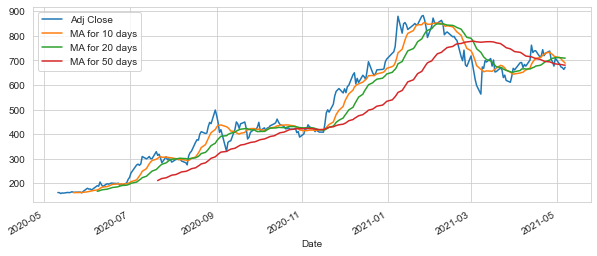

In [14]:
TSLA[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['TSLA','GOOG','MSFT','FB'],'yahoo',start,end)['Adj Close']

In [16]:
# Let's take a quick look
closing_df.head()

Symbols,TSLA,GOOG,MSFT,FB
Date,,,,
2020-05-11,162.257996,1403.260010,184.861435,213.179993
2020-05-12,161.882004,1375.739990,180.673965,210.100006
2020-05-13,158.192001,1349.329956,177.941742,205.100006
2020-05-14,160.666000,1356.130005,178.713898,206.809998
2020-05-15,159.834000,1373.189941,181.317429,210.880005


In [17]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [36]:
# Let's take a quick look
tech_rets.head()

Symbols,TSLA,GOOG,MSFT,FB
Date,,,,
2020-05-11,NaN,NaN,NaN,NaN
2020-05-12,-0.002317,-0.019611,-0.022652,-0.014448
2020-05-13,-0.022794,-0.019197,-0.015122,-0.023798
2020-05-14,0.015639,0.005040,0.004339,0.008337
2020-05-15,-0.005178,0.012580,0.014568,0.019680


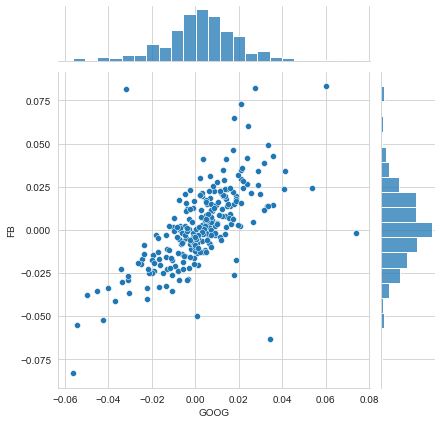

In [18]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
#sns.regplot(x=x, y=y),
sns.jointplot(x='GOOG',y='FB',data=tech_rets,kind='scatter')

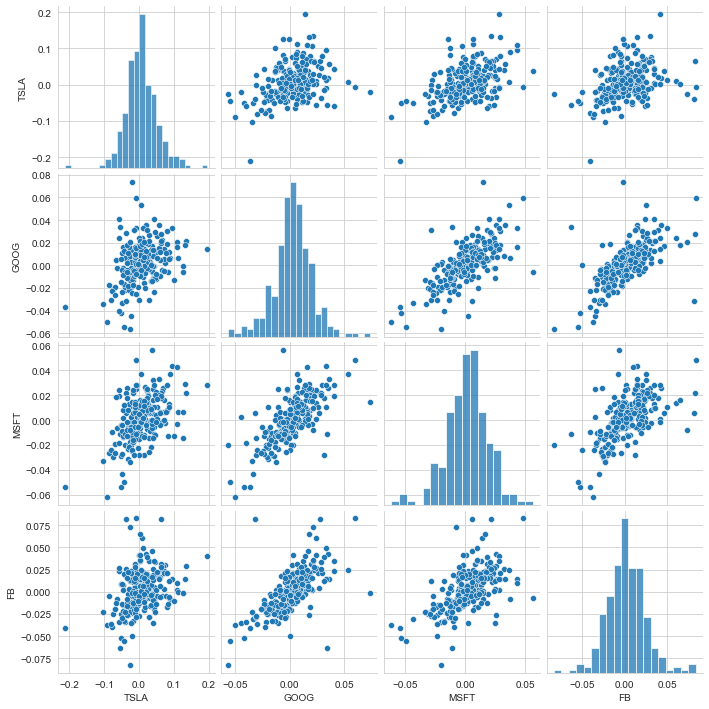

In [19]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

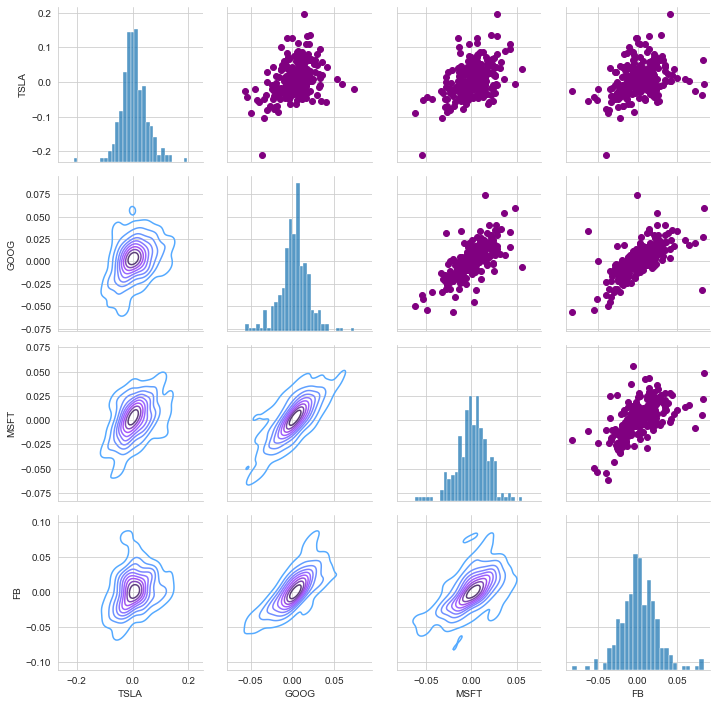

In [33]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(sns.histplot,bins=30)

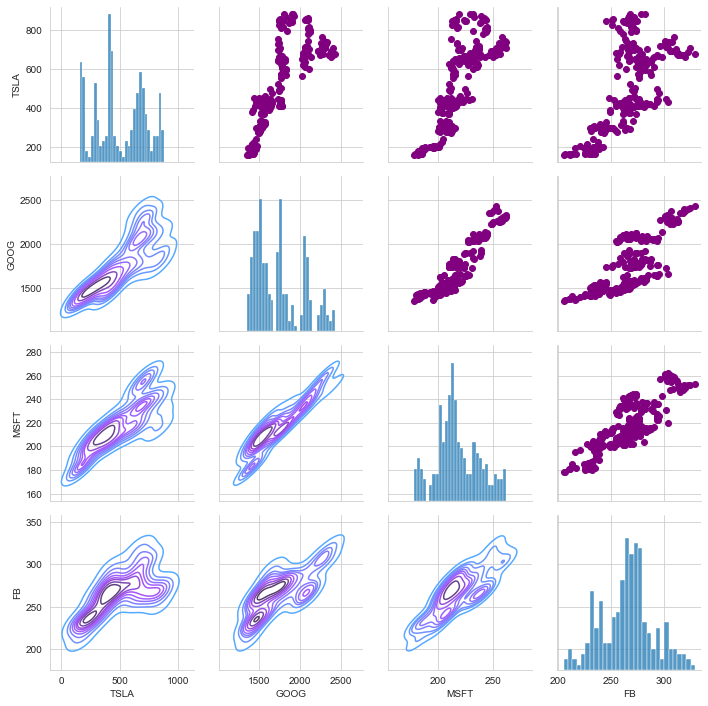

In [34]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(sns.histplot,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

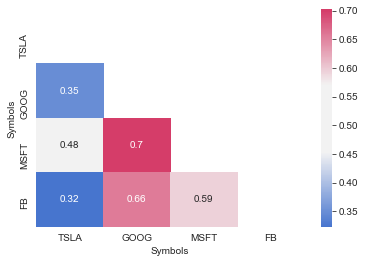

In [22]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
corr=tech_rets.dropna().corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True,mask=mask)

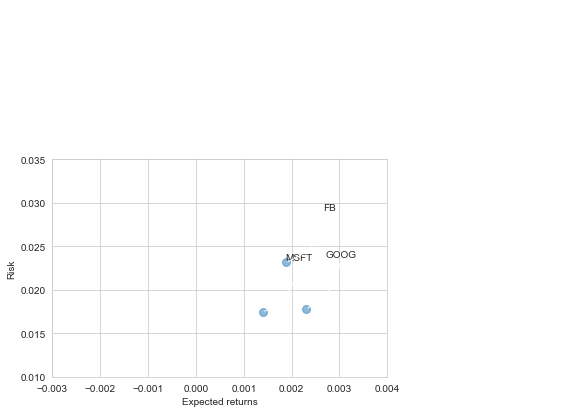

In [31]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.035])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

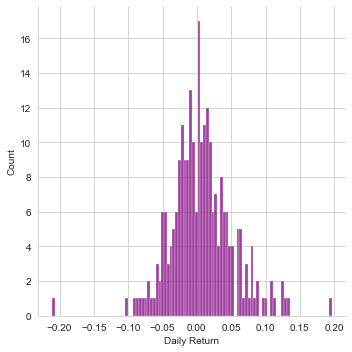

In [24]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.displot(TSLA['Daily Return'].dropna(),bins=100,color='purple')

In [25]:
# The 0.05 empirical quantile of daily returns
rets['FB'].quantile(0.05)

-0.03351983819170221

In [26]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [27]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

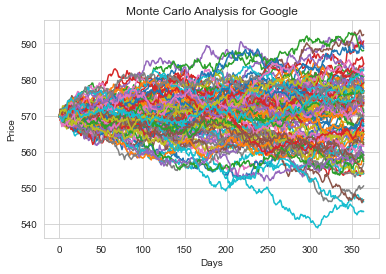

In [28]:
# Get start price from GOOG.head()
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [29]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

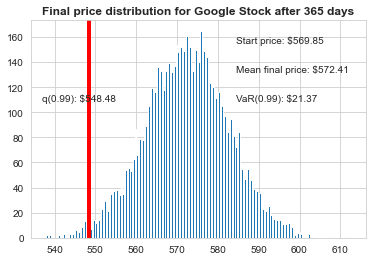

In [30]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');